# 實價登錄房價分析

> The code was download from the following youtube page. 

#### Reference 
* [【實價登錄】房地產價格分析 | 房子這樣買最保值! | 用3張圖表決定黃金地段 | FinLab 財經實驗室](https://youtu.be/BWzOlsM4AXs)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 下載實價登入

In [ ]:
import requests
import os
import zipfile
import time

You should
1.  mount your google drive first, and then key-in the correct path of your folder. 


In [ ]:
# Go to your google drive folder
os.chdir('/content/drive/MyDrive/Colab Notebooks/Intro_machine_learning/House_price_analysis') 
os.listdir()

['1021.zip',
 'real_estate1021',
 '1022.zip',
 'real_estate1022',
 '1023.zip',
 'real_estate1023',
 '1024.zip',
 'real_estate1024',
 '1031.zip',
 'real_estate1031',
 '1032.zip',
 'real_estate1032',
 '1033.zip',
 'real_estate1033',
 '1034.zip',
 'real_estate1034',
 '1041.zip',
 'real_estate1041',
 '1042.zip',
 'real_estate1042',
 '1043.zip',
 'real_estate1043',
 '1044.zip',
 'real_estate1044',
 '1051.zip',
 'real_estate1051',
 '1052.zip',
 'real_estate1052',
 '1053.zip',
 'real_estate1053',
 '1054.zip',
 'real_estate1054',
 '1061.zip',
 'real_estate1061',
 '1062.zip',
 'real_estate1062',
 '1063.zip',
 'real_estate1063',
 '1064.zip',
 'real_estate1064',
 '1071.zip',
 'real_estate1071',
 '1072.zip',
 'real_estate1072',
 '1073.zip',
 'real_estate1073',
 '1074.zip',
 'real_estate1074',
 '1081.zip',
 'real_estate1081',
 '1082.zip',
 'real_estate1082',
 '1083.zip',
 'real_estate1083',
 '1084.zip',
 'real_estate1084',
 '1091.zip',
 'real_estate1091',
 '1092.zip',
 'real_estate1092',
 '1093.zip

In [ ]:
# Crawl data
# Better store in your GDrive, so don't need to re-do it every time
def real_estate_crawler(year, season):
    if year > 1000:
        year -= 1911

    # download real estate zip file
    res = requests.get("https://plvr.land.moi.gov.tw//DownloadSeason?season="+str(year)+"S"+str(season)+"&type=zip&fileName=lvr_landcsv.zip")

    # save content to file
    fname = str(year)+str(season)+'.zip'
    open(fname, 'wb').write(res.content)

    # make additional folder for files to extract
    folder = 'real_estate' + str(year) + str(season)
    if not os.path.isdir(folder):
        os.mkdir(folder)

    # extract files to the folder
    with zipfile.ZipFile(fname, 'r') as zip_ref:
        zip_ref.extractall(folder)

    time.sleep(10)

for year in range(102, 110):
    for season in range(1,5):
        print('crawl ', year, 'Q', season)
        real_estate_crawler(year, season)

crawl  102 Q 1
crawl  102 Q 2
crawl  102 Q 3
crawl  102 Q 4
crawl  103 Q 1
crawl  103 Q 2
crawl  103 Q 3
crawl  103 Q 4
crawl  104 Q 1
crawl  104 Q 2
crawl  104 Q 3
crawl  104 Q 4
crawl  105 Q 1
crawl  105 Q 2
crawl  105 Q 3
crawl  105 Q 4
crawl  106 Q 1
crawl  106 Q 2
crawl  106 Q 3
crawl  106 Q 4
crawl  107 Q 1
crawl  107 Q 2
crawl  107 Q 3
crawl  107 Q 4
crawl  108 Q 1
crawl  108 Q 2
crawl  108 Q 3
crawl  108 Q 4
crawl  109 Q 1
crawl  109 Q 2
crawl  109 Q 3
crawl  109 Q 4


### Colab 進行matplotlib繪圖時顯示繁體中文

In [ ]:
## 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

# title 數據分析
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname='/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')
myfont.set_size(15)

--2021-09-22 12:29:09--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.214.102, 173.194.214.100, 173.194.214.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.214.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4bsqcegqmgk3jpf1qrnnimlkcckihj80/1632313725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-09-22 12:29:14--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/4bsqcegqmgk3jpf1qrnnimlkcckihj80/1632313725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.213.132, 2607:f8b0:400c:c0a::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

## 縣市選擇

## 選一個縣市研究

In [ ]:
location = "\u53F0\u5317\u5E02" #@param ['台北市','苗栗縣','花蓮縣','台中市','台中縣','台東縣','基隆市','南投縣','澎湖縣','台南市','彰化縣','高雄市','雲林縣','金門縣','台北縣','嘉義縣','連江縣','宜蘭縣','台南縣','嘉義市','桃園縣','高雄縣','新竹市','新竹縣','屏東縣']

In [ ]:
location_str = """台北市 A 苗栗縣 K 花蓮縣 U
台中市 B 台中縣 L 台東縣 V
基隆市 C 南投縣 M 澎湖縣 X
台南市 D 彰化縣 N 
高雄市 E 雲林縣 P 金門縣 W
台北縣 F 嘉義縣 Q 連江縣 Z
宜蘭縣 G 台南縣 R 嘉義市 I
桃園縣 H 高雄縣 S 新竹市 O
新竹縣 J 屏東縣 T"""

locToLetter = dict(zip(location_str.split()[::2], location_str.lower().split()[1::2]))

In [ ]:
import os
import pandas as pd

# 歷年資料夾
dirs = [d for d in os.listdir() if d[:4] == 'real']

dfs = []

for d in dirs:
    df = pd.read_csv(os.path.join(d,locToLetter[location] + '_lvr_land_a.csv'), index_col=False)
    df['Q'] = d[-1]
    dfs.append(df.iloc[1:])
    
df = pd.concat(dfs, sort=True)

# 新增交易年份
df['year'] = pd.to_numeric(df['交易年月日'].str[:-4], errors='coerce') + 1911

# 平方公尺換成坪
df['單價元平方公尺'] = df['單價元平方公尺'].astype(float)
df['單價元坪'] = df['單價元平方公尺'] * 3.30579

# 建物型態
df['建物型態2'] = df['建物型態'].str.split('(').str[0]

# 刪除有備註之交易（多為親友交易、價格不正常之交易）
df = df[df['備註'].isnull()]

# 將index改成年月日
df.index = pd.to_datetime(df['year'].astype(str) + df['交易年月日'].str[-4:] ,errors='coerce')
df.sort_index(inplace=True)
df.head(2)

,Q,主建物面積,主要建材,主要用途,交易年月日,交易標的,交易筆棟數,備註,單價元平方公尺,土地位置建物門牌,土地移轉總面積平方公尺,建物型態,建物現況格局-廳,建物現況格局-房,建物現況格局-衛,建物現況格局-隔間,建物移轉總面積平方公尺,建築完成年月,有無管理組織,移轉層次,移轉編號,編號,總價元,總樓層數,車位移轉總面積(平方公尺),車位總價元,車位類別,都市土地使用分區,鄉鎮市區,附屬建物面積,陽台面積,電梯,非都市土地使用分區,非都市土地使用編定,year,單價元坪,建物型態2
1911-12-30,2,0.0,見其他登記事項,停車空間,01230,車位,土地0建物0車位1,NaN,NaN,臺北市南港區忠孝東路六段21號地下三層,2.72,其他,0,0,0,有,42.7,0931216,有,地下三層,NaN,RPVNMLKMLHMFFDA87CA,1750000,十七層,0.0,1750000,坡道平面,商,南港區,0.0,0.0,NaN,NaN,NaN,1911,NaN,其他
2003-04-15,4,0.0,鋼骨鋼筋混凝土造,見其他登記事項,920415,車位,土地0建物0車位1,NaN,NaN,臺北市大安區光復南路２９０巷２８號地下一層,0.14,其他,0,0,0,有,19.65,1010613,無,地下一層,NaN,RPROMLRLQHIFFFA48CA,1500000,十四層,19.65,1500000,坡道平面,住,大安區,0.0,0.0,NaN,NaN,NaN,2003,NaN,其他


## 價格與漲跌的相關性

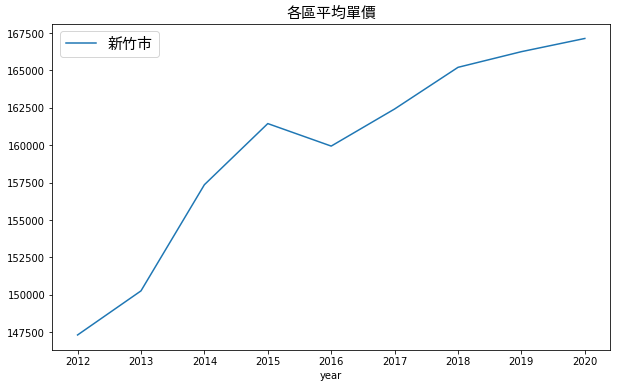

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)

prices = {}
for district in set(df['鄉鎮市區']):
    cond = (
        (df['主要用途'] == '住家用')
        & (df['鄉鎮市區'] == district)
        & (df['單價元坪'] < df["單價元坪"].quantile(0.95))
        & (df['單價元坪'] > df["單價元坪"].quantile(0.05))
        )
    groups = df[cond]['year']
    prices[district] = df[cond]['單價元坪'].astype(float).groupby(groups).mean().loc[2012:]
    
price_history = pd.DataFrame(prices)
price_history.plot()
plt.title('各區平均單價',fontproperties=myfont)
plt.legend(prop=myfont)
plt.show()

In [ ]:
district_price = df.reset_index()[['鄉鎮市區', '單價元坪']].dropna()
district_price = district_price[district_price['單價元坪'] < 2000000]

import plotly.express as px
fig = px.histogram(district_price, x="單價元坪", color="鄉鎮市區", marginal="rug", nbins=50) # can be `box`, `violin`)

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

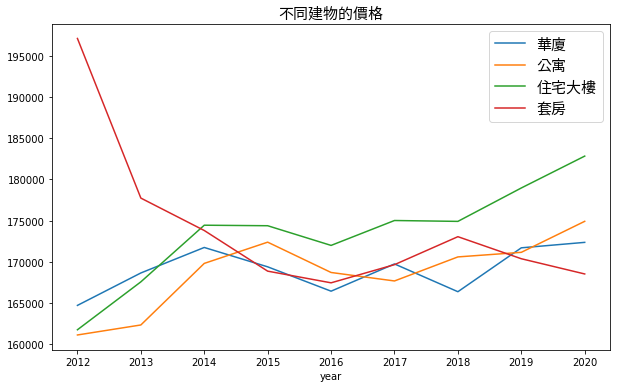

In [ ]:
types = ['華廈', '公寓', '住宅大樓', '套房']#'店面', '套房', '其他', '農舍', '倉庫', '廠辦', '透天厝', '工廠']

building_type_prices = {}
for building_type in types:
    cond = (
        (df['主要用途'] == '住家用')
        & (df['單價元坪'] < df["單價元坪"].quantile(0.8))
        & (df['單價元坪'] > df["單價元坪"].quantile(0.2))
        & (df['建物型態2'] == building_type)
        )
    building_type_prices[building_type] = df[cond]['單價元坪'].groupby(df[cond]['year']).mean().loc[2012:]
pd.DataFrame(building_type_prices).plot()
plt.title('不同建物的價格',fontproperties=myfont)
plt.legend(prop=myfont)
plt.show()

In [ ]:
import numpy as np
mean_value = price_history.mean()

gain = (price_history.iloc[-1] /  price_history.iloc[0])
mean = price_history.mean()

compare = pd.DataFrame({'上漲幅度': gain, '平均價格': mean}).dropna()
corr = (compare.corr().iloc[0,1])

print('相關性：', corr)
if corr > 0:
  print('意涵：價格越高越保值')
else:
  print('意涵：價格越低越保值')
print()
print('各區平均價格')
mean.sort_values()

相關性： -0.2670148409681417
意涵：價格越低越保值

各區平均價格


東勢區     94765.842798
新社區    105144.469843
中區     105420.474635
外埔區    110604.606782
石岡區    111577.290817
大肚區    114489.417819
大甲區    118033.722466
大安區    118856.624655
清水區    124800.576801
龍井區    130971.897483
梧棲區    132828.459709
東區     138151.074376
大雅區    138924.221466
沙鹿區    141473.566038
神岡區    141785.023228
南區     144028.050541
潭子區    146237.846301
霧峰區    150933.621192
豐原區    154460.768744
西區     158313.677467
北區     160120.330896
后里區    160347.066773
北屯區    171101.856932
太平區    176643.321289
烏日區    181044.701030
大里區    183613.014464
南屯區    198115.817267
西屯區    198154.053978
和平區              NaN
dtype: float64

In [ ]:
gain = (price_history.iloc[-1] /  price_history.iloc[0])
mean = price_history.mean()

compare = pd.DataFrame({'上漲幅度': gain, '平均價格': mean}).dropna()
print(compare.corr().iloc[0,1])

nan


In [ ]:
compare

,上漲幅度,平均價格
新竹市,1.134544,159704.07567
